In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [100]:
data=pd.read_csv('blackFriday_train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [101]:
data.shape

(550068, 12)

In [102]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


we can clearly see that two features have many null values 
so filling all the null values in the features

droping product_category_3 from the data set because it have null value nearly 70%. 

In [104]:
data=data.drop(['Product_Category_3'],1)

now Product_Category_2 is left so replacing null values by mode 

In [105]:
data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [106]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

now applying get dummies to convert object data type into numeric form

In [107]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Purchase                      18105
dtype: int64

In [108]:
data['Product_ID'] = data['Product_ID'].str.replace('P','')

In [109]:
data['Product_ID'] 

0         00069042
1         00248942
2         00087842
3         00085442
4         00285442
            ...   
550063    00372445
550064    00375436
550065    00375436
550066    00375436
550067    00371644
Name: Product_ID, Length: 550068, dtype: object

In [110]:
data['Product_ID'] = pd.to_numeric(data['Product_ID'].astype(str), errors='coerce')

In [111]:
data['Product_ID'] 

0          69042
1         248942
2          87842
3          85442
4         285442
           ...  
550063    372445
550064    375436
550065    375436
550066    375436
550067    371644
Name: Product_ID, Length: 550068, dtype: int64

In [112]:
data_dummies=pd.get_dummies(data=data,columns=['Gender','Age','City_Category','Stay_In_Current_City_Years'],drop_first=True)
data_dummies

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,69042,10,0,3,8.0,8370,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1000001,248942,10,0,1,6.0,15200,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1000001,87842,10,0,12,8.0,1422,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1000001,85442,10,0,12,14.0,1057,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1000002,285442,16,0,8,8.0,7969,1,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,372445,13,1,20,8.0,368,1,0,0,0,0,1,0,1,0,1,0,0,0
550064,1006035,375436,1,0,20,8.0,371,0,0,1,0,0,0,0,0,1,0,0,1,0
550065,1006036,375436,15,1,20,8.0,137,0,0,1,0,0,0,0,1,0,0,0,0,1
550066,1006038,375436,1,0,20,8.0,365,0,0,0,0,0,0,1,0,1,0,1,0,0


In [113]:
data_dummies.skew()


User_ID                          0.003066
Product_ID                       0.138389
Occupation                       0.400140
Marital_Status                   0.367437
Product_Category_1               1.025735
Product_Category_2               0.198726
Purchase                         0.600140
Gender_M                        -1.173946
Age_18-25                        1.655514
Age_26-35                        0.411654
Age_36-45                        1.500013
Age_46-50                        3.021075
Age_51-55                        3.370821
Age_55+                          4.756113
City_Category_B                  0.323085
City_Category_C                  0.815637
Stay_In_Current_City_Years_1     0.618131
Stay_In_Current_City_Years_2     1.621301
Stay_In_Current_City_Years_3     1.726964
Stay_In_Current_City_Years_4+    1.916875
dtype: float64

there is no skewness present in the data

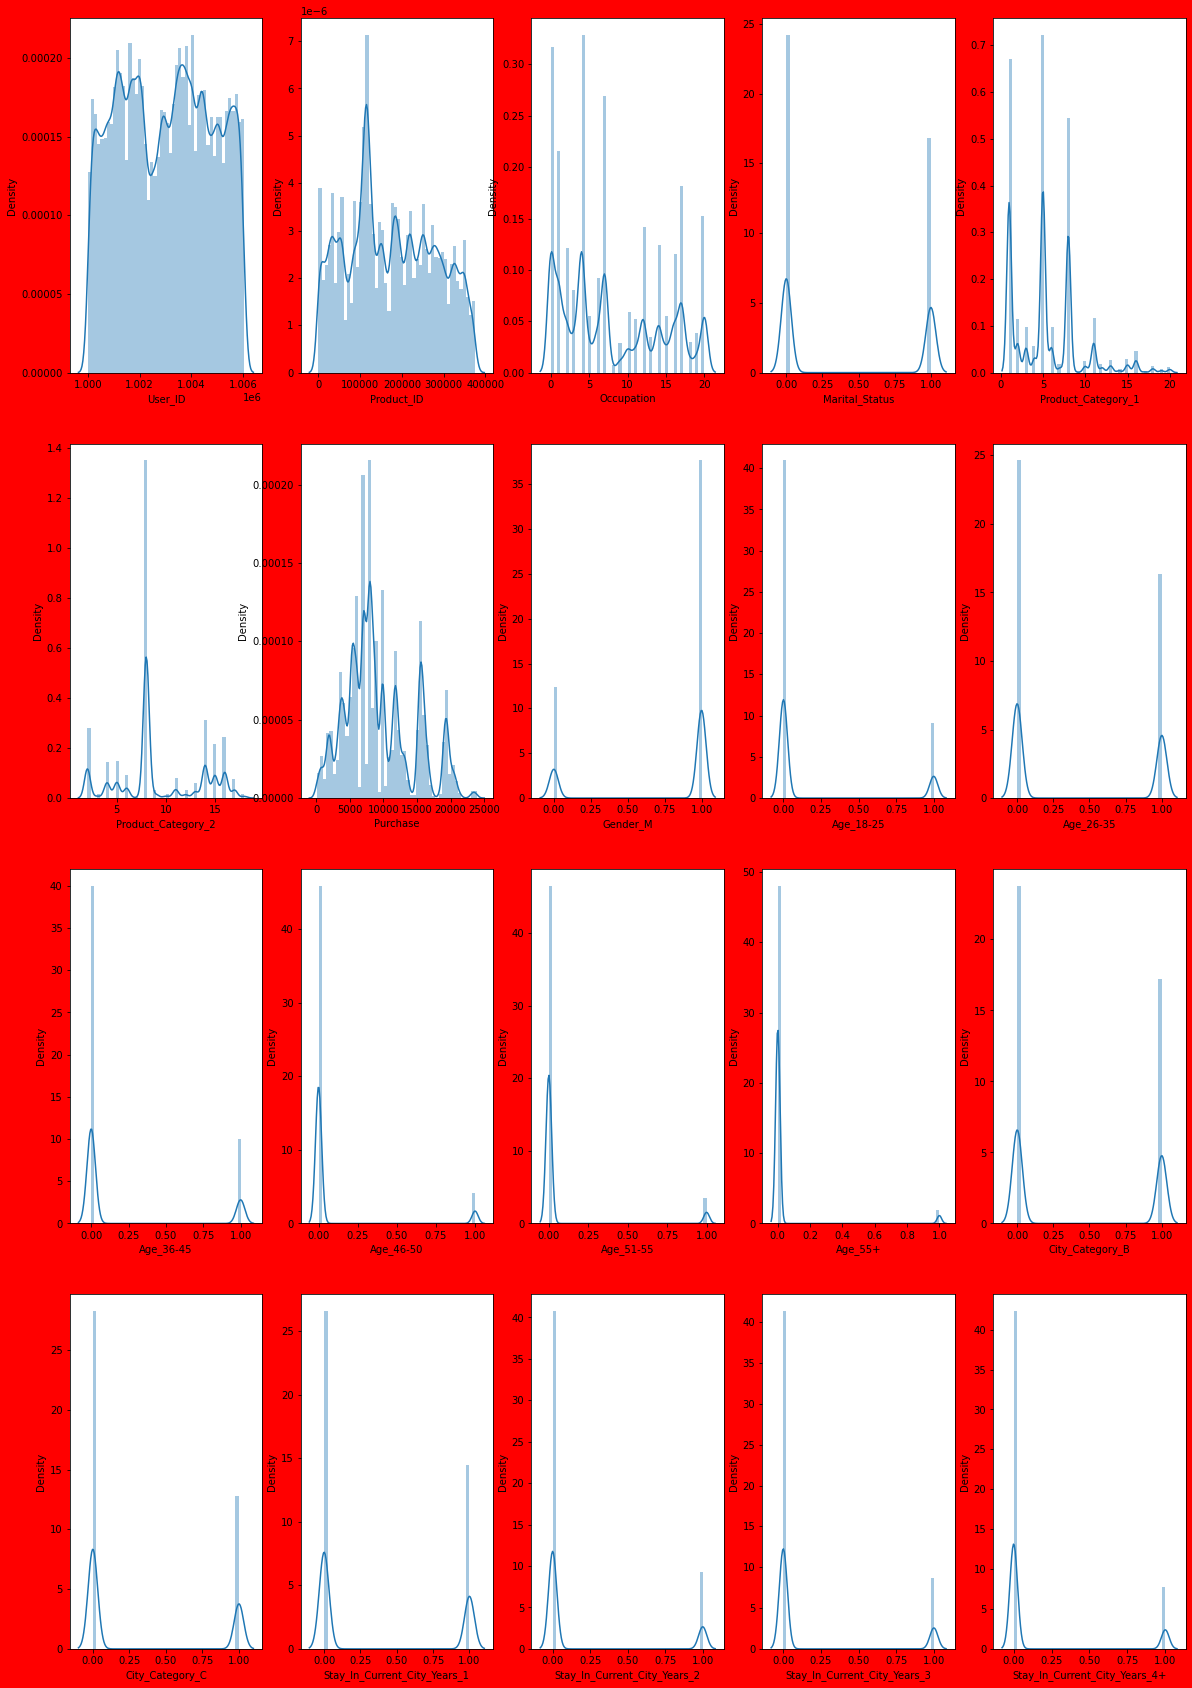

In [114]:
plt.figure(figsize=(20,30),facecolor='red')
plotnumber=1
for column in data_dummies:
    if plotnumber<=22:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(data_dummies[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

from distplot not much is observed only we can see that most of features are categorical

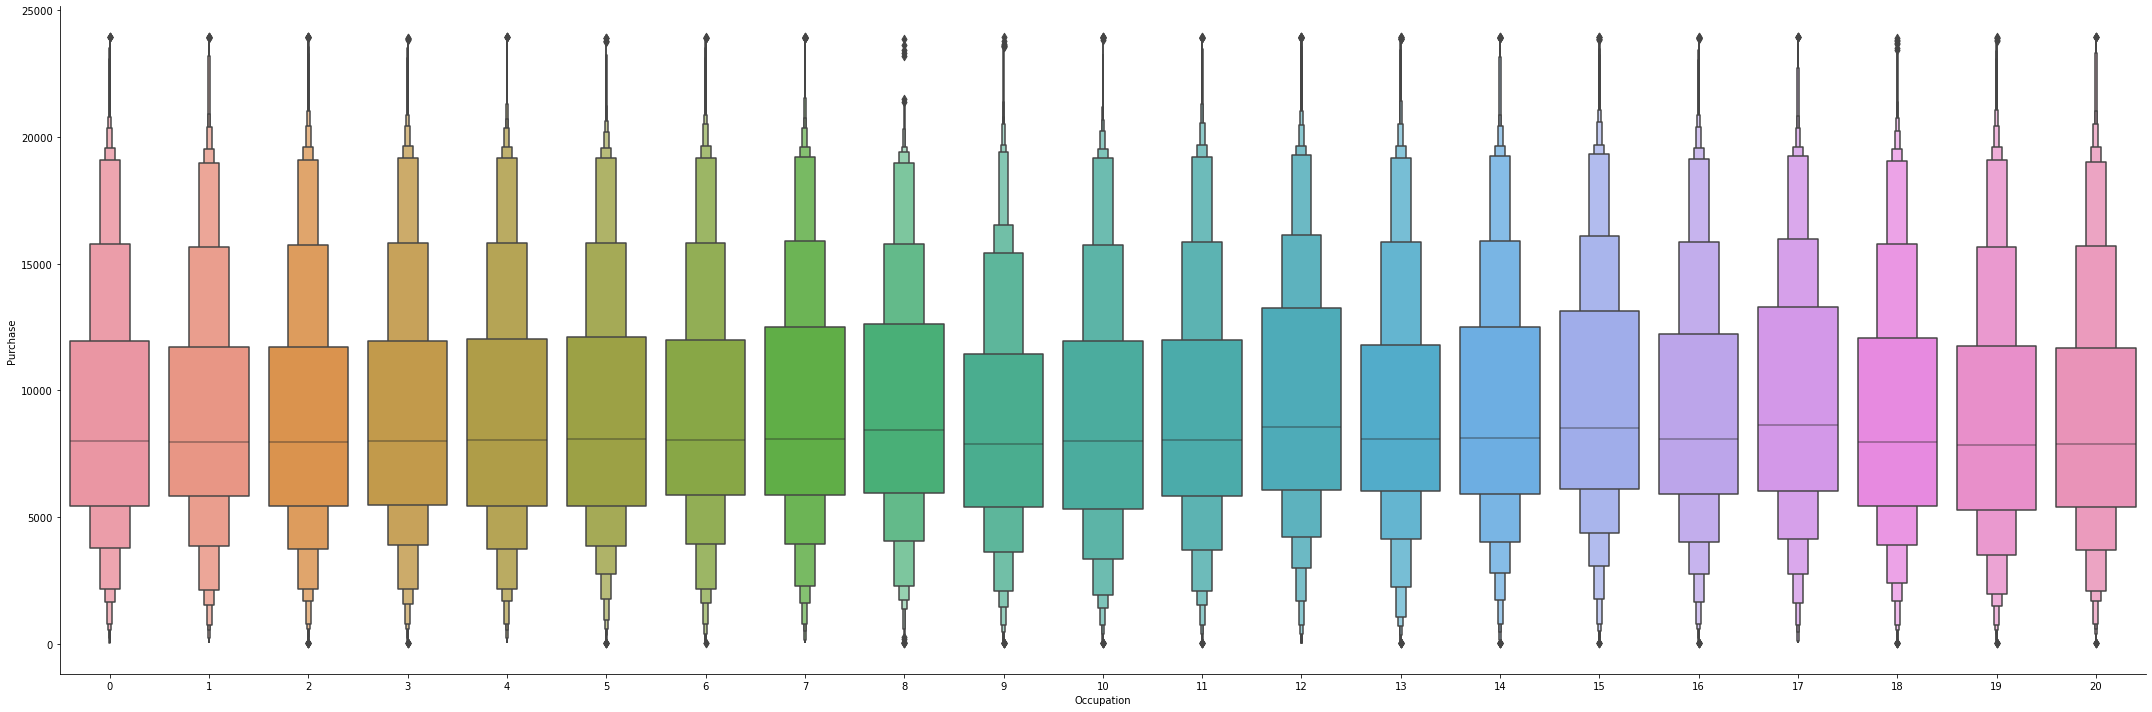

In [115]:
sns.catplot(y='Purchase',x='Occupation',data=data,kind="boxen",height=10,aspect=3)
plt.show()

outlier can be clearly observed from the above graph it is showing maximum in 8 category 

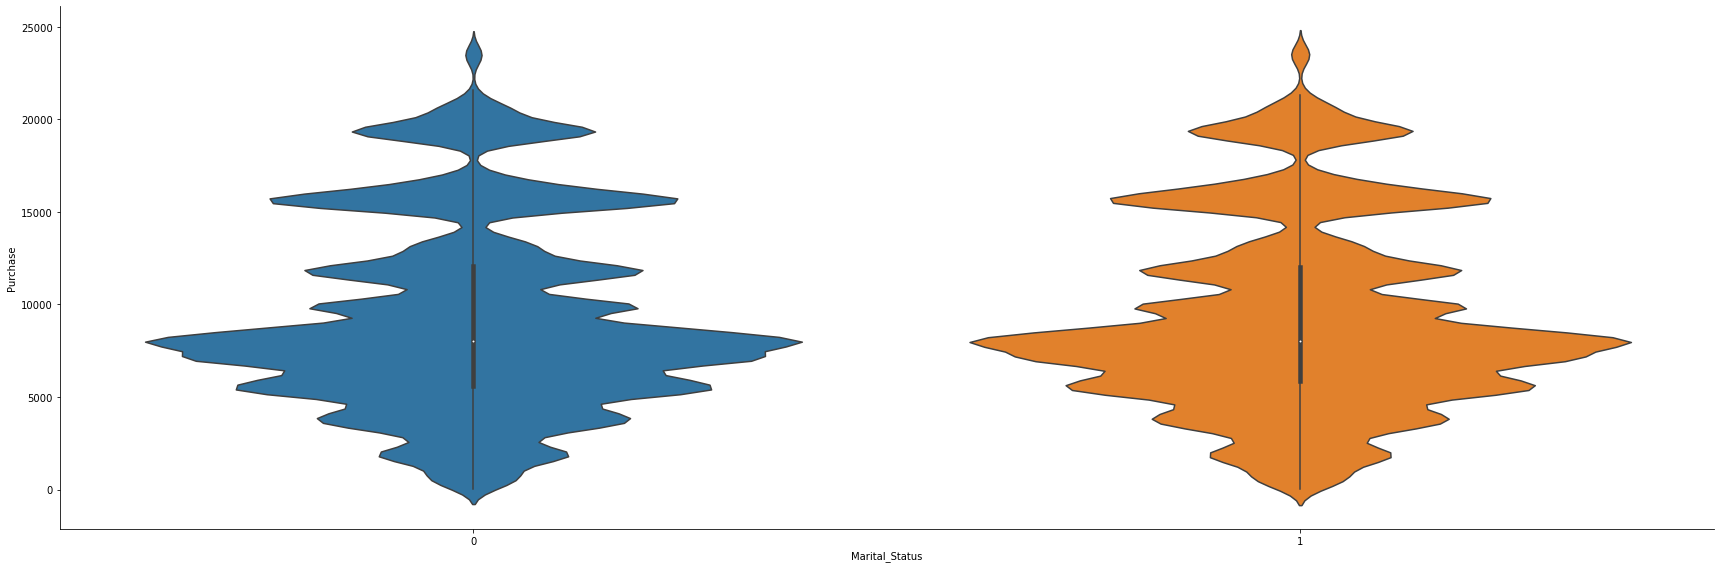

In [116]:
sns.catplot(y = "Purchase", x = "Marital_Status", data =data,kind="violin", height = 8, aspect = 3)
plt.show()

from martial_status of any person effect on purchase do not vary that either 0 or 1 both are showing nearly same

<AxesSubplot:xlabel='Age', ylabel='count'>

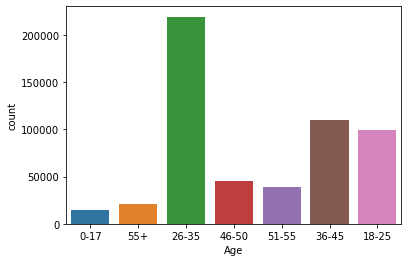

In [118]:
sns.countplot(x='Age', data=data)

from count of age it can be infered that age group of 26-35 are more in count 

<AxesSubplot:xlabel='Occupation', ylabel='count'>

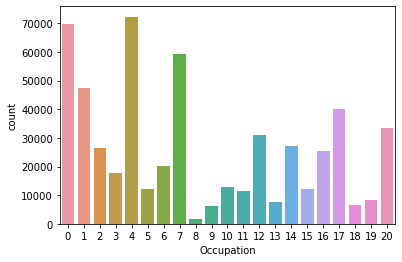

In [119]:
sns.countplot(x='Occupation', data=data)

it can be observed that occupation type 4 has maximum number abd type 8 are least in numbers

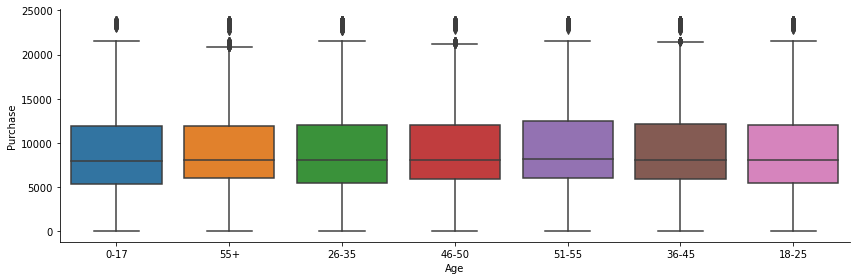

In [120]:
sns.catplot(y = "Purchase", x = "Age", data = data, kind="box", height = 4, aspect = 3)
plt.show()

from above plot it can be analysed that there are many outliers present in age features 

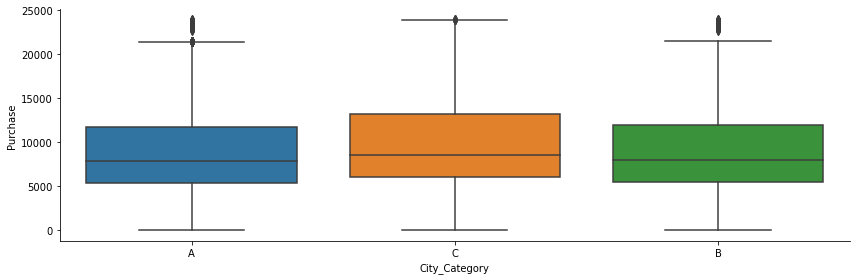

In [121]:
sns.catplot(y = "Purchase", x = "City_Category", data = data, kind="box", height = 4, aspect = 3)
plt.show()

from above cat plot it can be seen that city category B purchase more than other two category and category A purchase is least of all three

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

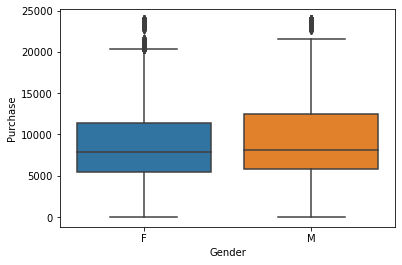

In [123]:
sns.boxplot(x='Gender', y='Purchase', data=data)

from above plot it can be seen that in female category of gender there are more outliers and purchase of male is more than female

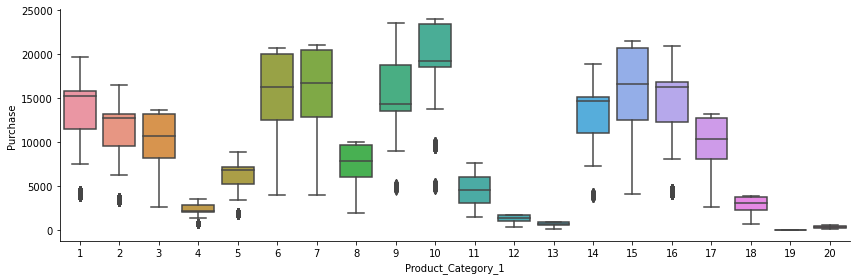

In [127]:
sns.catplot(y = "Purchase", x = "Product_Category_1", data = data, kind="box", height = 4, aspect = 3)
plt.show()

it can be observed from above graph that category 10 of product_category_1 is most purchased and 19 and 20 is least purchased

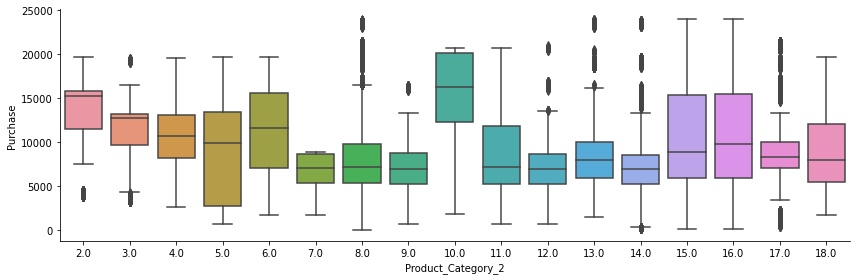

In [128]:
sns.catplot(y = "Purchase", x = "Product_Category_2", data = data, kind="box", height = 4, aspect = 3)
plt.show()

it can be observed from above graph that 10,15 and 16 is purchase maximum, and maximum outliers are present in 17 and 8

In [130]:
corr=data.corr()
corr.shape

(7, 7)

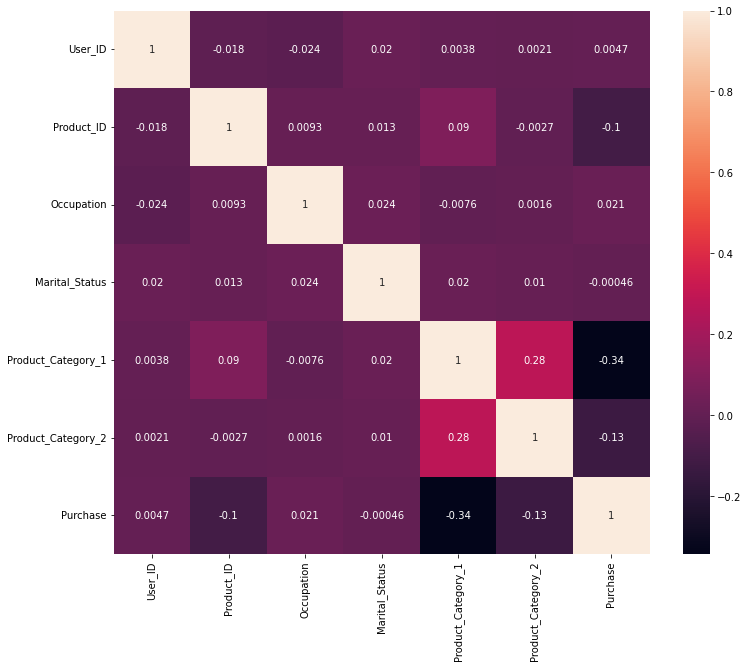

In [131]:
plt.figure(figsize=(12,10))

sns.heatmap(corr,annot=True)
plt.show()

from heat map it can be observed that no two features are tightly corelated with each other nor they are corelated with label 